## Qu'est ce qu'une équation différentielle

exemples en mécanique de Newton $$m x'' = F(x,x')$$
problème des 3 corps.

exemples en biologie

Malthus $ x' = a x$  solution exponentielle $$x(t) = c \exp(at)$$ 

Logistique $x' = a x - b x^2$ solution $$x(t) =\frac{\exp  a t}{c+ \exp a t}$$

glucose , insuline dans le sang

Lotka-Volterra (proie- prédateur)

## Un peu de théorie
$$y' = f(t,y), y(0)= y_0$$
$$y(t) = y_0 + \int_0^t f(s,y(s)) \,ds$$
schéma des approximations successives:
## théorème de Cauchy-Lipschitz
exemple pour l'exponentielle $y'=y, \quad y(0) =1$
$$y_1(t) = y_0 + \int_0^t y_0 \,ds= 1 + t$$
$$y_2(t) = y_0 + \int_0^t y_1(s) \,ds= 1 + t + t^2/2$$
$$y_n(t) = y_0 + \int_0^t y_{n-1}(s) \,ds = 1 + t + t^2/2+ \ldots +t^n/n!$$
theorème d'existence et d'unicité mais pas pratique pour le calcul numérique en général

In [1]:
from IPython.display import IFrame
url="https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_de_Cauchy-Lipschitz#Énoncés"
IFrame(url,width=800, height=600)

## Des cas qui violent la causalité: non unicité des solutions quand f non lipschitz par rapport à la variable y
$$y' = 2\sqrt{y}, \quad y(0)=0$$
$$y(t) = t^2$$ est solution pour $t\geq 0$ mais aussi $$y(t) =0$$

## Visualisation d'une équation différentielle
champ de vecteur
tracé de champs de vecteurs en python (quiver?)
portrait de phase (cas des équations du second  ordre ou des systèmes de 2 équations du premier ordre)
symétries (cf exemple dans wolfram alpha)
python peut inclure des url


In [2]:
url="http://demonstrations.wolfram.com/SlopeFields/"
IFrame(url, width=1024, height=768)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

X, Y = np.meshgrid(np.arange(-4, 4.2, .25), np.arange(0, 1.5, .05))
U = np.ones_like(X)
#V = X-Y
V=Y-Y**2
fig1 = plt.figure(figsize=(10, 8))
plt.title('champ de vecteurs associé à $dy/dt =y- y^2$ ')
plt.quiver(X, Y, U, V,angles='xy', scale_units='xy', scale=5)
t=np.arange(-4,4.2,0.2)
y=np.divide(np.exp(t),np.exp(t)+ 0.4)
plt.plot(t,y,label='une courbe integrale')
plt.legend(loc='best')
#plt.legend(' courbe intégrale')
plt.show()

<Figure size 1000x800 with 1 Axes>

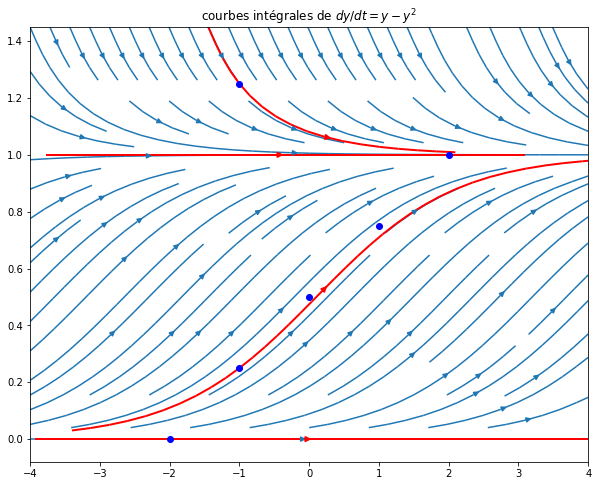

In [4]:
import matplotlib.pyplot as plt
import numpy as np

X, Y = np.meshgrid(np.arange(-4, 4.2, .25), np.arange(0, 1.5, .05))
U = np.ones_like(X)
#V = X-Y
V=Y-Y**2
fig1 = plt.figure(figsize=(10, 8))
plt.title('courbes intégrales de $dy/dt =y- y^2$ ')
plt.streamplot(X, Y, U, V)
#plt.legend(' courbe intégrale')
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [0, 0.25,  0.5, 0.75, 1, 1.25]])

strm = plt.streamplot(X, Y, U, V, color=U, linewidth=2,
                     cmap='autumn', start_points=seed_points.T)
#fig1.colorbar(strm.lines)
# Displaying the starting points with blue symbols.
plt.plot(seed_points[0], seed_points[1], 'bo')
plt.show()

## Résolution analytique: très rare
quelques exemples,
idée: utiliser les symétries des champs de vecteur

In [5]:
url="http://www.wolframalpha.com//examples/mathematics/differential-equations/"
IFrame(url, width=800, height=600)

## Schémas numériques
comment calculer numériquement une approximation
Euler, rudimentaire, beaucoup de points nécessaires
point milieu, ordre 2
Heun (le premier schéma codé) ordre 3
ordre d'un schéma

Runge-Kutta
Dormand-Prince

##  Le schéma d'Euler
$$y'(t)= \frac{dy}{dt} \approx \frac{y(t+h) - y(t)}{h}$$
$$y(t+h) \approx y(t) + h\,f(t,y(t))$$
On génère une suite de valeurs $y_n$ aux instants $t_n = t_0 + n\cdot h$

le schéma s'écrit
$$y_{n+1} = y_n + h\cdot f(t_n,y_n)$$
où $y_0$ est la valeur initiale $y(t_0)$


In [6]:
import numpy as np
#schéma d'Euler
def euler(f, t0, y0, h, tfin):
    t=np.arange(t0,tfin+h,h) # la subdivision, python n'atteint pas la borne superieure :-(
    y = np.zeros(len(t)) # initialisation
    y[0] = y0
    for n in range(len(t)-1):
        y[n+1] = y[n] + h*f(t[n], y[n])
    return y


In [7]:
import math
# definition de la fonction dans l'EDO
def f(t,y):
    return y

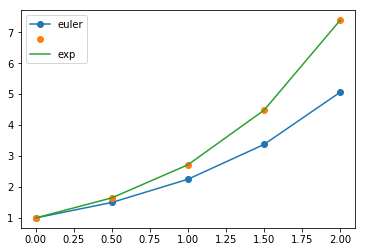

In [8]:
import matplotlib.pyplot as plt
# tinitial, donnee initiale, pas de temps, tfinal
t0,y0=0,1 
def quadeuler(  h=1/2, tfin = 2):
# appel de la fonction
    y=euler(f, t0, y0, h, tfin)
    t=np.arange(t0,tfin+h,h)
    plt.plot(t,y,'-o')
    z=y0*np.exp(t)
    plt.plot(t,z,'o')
    tt=np.arange(t0,tfin+h,h)
    plt.plot(tt,y0*np.exp(tt),'-')
    plt.legend(['euler','','exp'])
quadeuler()    

In [9]:
from ipywidgets import interact
interact(quadeuler,  h=(1/8, 1, 1/8), tfin=(1,5));

interactive(children=(FloatSlider(value=0.5, description='h', max=1.0, min=0.125, step=0.125), IntSlider(value…

## Convergence quand le pas de temps $h\to 0$
On peut essayer avec des pas de plus en plus petits.

In [10]:
tfin=2.0
pas = [1, 1/2, 1/4,  1/8, 1/16]
err=np.zeros(len(pas))
for i, h in enumerate(pas):
    y=euler(f,t0,y0,h,tfin)
    t=np.arange(t0,tfin+h,h)
    z=np.exp(t)
    erreur= np.max(np.abs(y-z))
    err[i]=erreur
err   

array([3.3890561 , 2.3265561 , 1.42859162, 0.80580593, 0.43038934])

## On trace en log log 

Text(0.5,1,'convergence Euler')

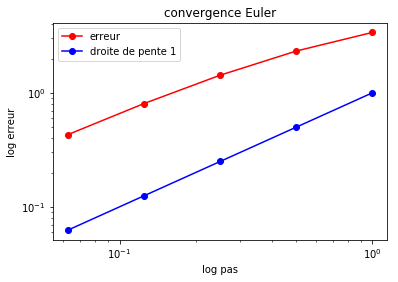

In [11]:
plt.loglog(pas, err,'-or')
plt.loglog(pas,pas,'-ob')
plt.legend(['erreur','droite de pente 1'])
plt.xlabel('log pas')
plt.ylabel('log erreur')
plt.title('convergence Euler')

 On constate que $\log erreur(h) \approx \log h + Cte$ donc que $erreur(h) = O(h)$
## On dit que le schéma d'Euler est d'ordre 1

## Un schéma plus précis
$$y(t+h) = y(t) + \int_t^{t+h} f(s,y(s)) \,ds$$
On approche l'intégrale par l'aire du trapèze
$$y(t+h) \approx y(t) + h \cdot \frac{f(t,y(t)) + f((t+h,y(t+h))}{2}$$
Problème: $y(t+h)$ n'est pas connu?
schéma explicite : on remplace $y(t+h)$ par la valeur donnée par Euler:
$y(t+h) \approx u= y(t) + h f(t,y(t))$
On obtient le schéma du trapèze explicite 
$$y(t+h) \approx y(t) + h \cdot \frac{f(t,y(t)) + f((t+h,u)}{2}$$
appelé ou schéma de Runge ou schéma de Heun (1895)

In [12]:
url="https://fr.wikipedia.org/wiki/Carl_Runge"
IFrame(url,width=800, height=600)

In [13]:
def runge(f, t0, y0, h, tfin):
    t=np.arange(t0,tfin+h,h) # python n'atteint pas la borne superieure :-()
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(len(t)-1):
        u = y[n] + h*f(t[n], y[n])
        y[n+1]= y[n]+ h*( f(t[n],y[n])+f(t[n+1],u) )/2
    return y


In [14]:
y0,h=1, 1/2
ye=euler(f, t0, y0, h, tfin)
yr=runge(f, t0, y0, h, tfin)
yr

array([1.        , 1.625     , 2.640625  , 4.29101562, 6.97290039])

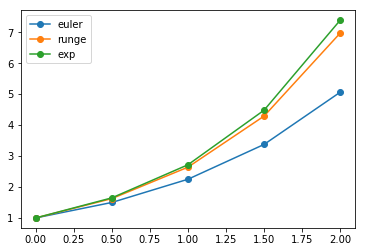

In [15]:
t=np.arange(t0,tfin+h,h)
plt.plot(t,ye,'-o')
z=np.exp(t)
plt.plot(t,yr,'-o')
plt.plot(t,z,'-o')
plt.legend(['euler','runge','exp'])

Text(0.5,1,'convergence Runge')

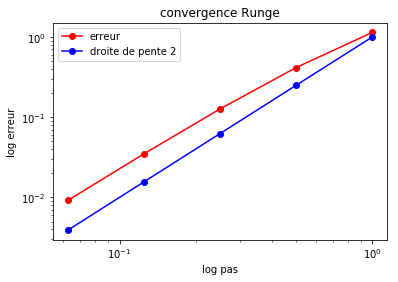

In [16]:
pas = [1, 1/2, 1/4,  1/8, 1/16]
err=np.zeros(len(pas))
for i, h in enumerate(pas):
    y=runge(f,t0,y0,h,tfin)
    t=np.arange(t0,tfin+h,h)
    z=np.exp(t)
    erreur= np.max(np.abs(y-z))
    err[i]=erreur
plt.loglog(pas, err,'-or')
plt.loglog(pas,np.power(pas,2),'-ob')
plt.legend(['erreur','droite de pente 2'])
plt.xlabel('log pas')
plt.ylabel('log erreur')
plt.title('convergence Runge')

## Exercice: Variante: méthode du point milieu
Méthodes d'ordre plus élevées
Méthode de Heun d'ordre 3
Méthode de Runge-Kutta 4
Méthode de Dormand-Prince

## Le  vrai pendule en python

On veut résoudre $\theta''(t) + b \theta'(t) + c \sin(\theta(t)) = 0$

on se ramène à un système de deux équations du premier ordre 

$\theta'(t) = \omega(t)$

$\omega'(t) = -b \omega(t) - c\sin(\theta(t))$

In [17]:
import numpy as np

In [18]:
from scipy.integrate import odeint 

In [19]:
 def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

valeurs des constantes

In [20]:
b = 0.05
c = 5.0

In [21]:
y0 = [np.pi - 0.1, 0.0] # pendule initial  quasiment vertical à vitesse nulle
t = np.linspace(0, 16, 101) # t entre 0 et 10, dt=0.01

In [22]:
sol = odeint(pend, y0, t, args=(b, c))

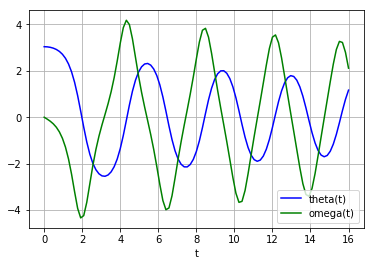

In [23]:
import matplotlib.pyplot as plt

plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()


Text(0.5,1,'plan de phase pendule amorti')

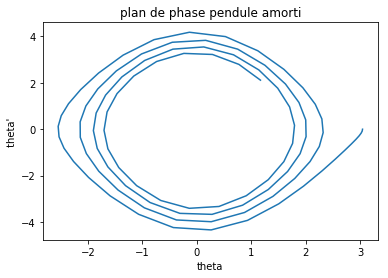

In [24]:
plt.plot(sol[:,0],sol[:,1])
plt.xlabel('theta')
plt.ylabel(" theta' ")
plt.title('plan de phase pendule amorti')

## d'apres https://pythonmatplotlibtips.blogspot.com/2018/01/solve-animate-single-pendulum-odeint-artistanimation.html

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint

In [53]:
b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 20, 301)

In [54]:
sol = odeint(pend, y0, t, args=(b, c))

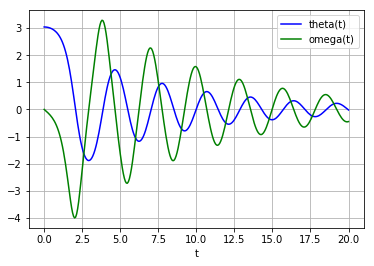

In [55]:
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

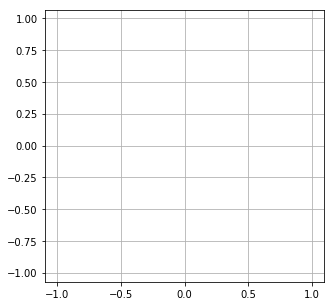

In [56]:
fig = plt.figure(figsize=(5, 5), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
plt.rcParams['font.size'] = 15

lns = []
for i in range(len(sol)):
    ln, = ax.plot([0, np.sin(sol[i, 0])], [0, -np.cos(sol[i, 0])],
                  color='k', lw=2)
    pt, = ax.plot([np.sin(sol[i, 0])],[-np.cos(sol[i, 0])],'o',c='k')
    tm = ax.text(-1, 0.9, 'time = %.1fs' % t[i])
    lns.append([ln, tm,pt])
ax.set_aspect('equal', 'datalim')
ax.grid()
ani = animation.ArtistAnimation(fig, lns, interval=50)

In [57]:
# pour sauvegarder
# fn = 'odeint_single_pendulum_artistanimation'
# ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)
# ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)

In [58]:
plt.rcParams['animation.html'] = 'html5'
ani

## Comparaison avec le pendule linéarisé

In [59]:
def pendapprox(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*theta]
    return dydt

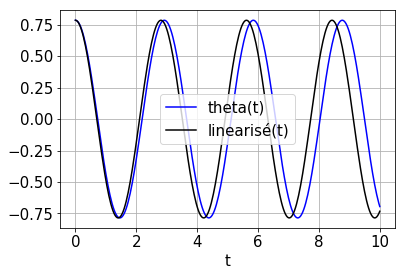

In [60]:
y0=[np.pi/4,0] # on part de moins haut
b=0.0
t = np.linspace(0, 10, 301)
solapp = odeint(pendapprox, y0, t, args=(b, c))
sol = odeint(pend, y0, t, args=(b,c))
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t,solapp[:,0],'k',label='linearisé(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

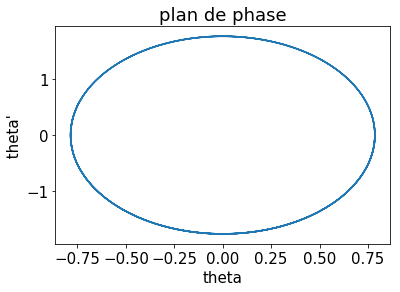

In [61]:
plt.plot(solapp[:,0],solapp[:,1])
plt.xlabel('theta')
plt.ylabel(" theta' ")
plt.title('plan de phase')
plt.show()

## Cela devrait être un cercle mais le schéma discret ne conserve pas l'énergie
## notion de schéma symplectique

## des paraboles avec la gravité

[array([80.]), array([40.])]


<IPython.core.display.Javascript object>


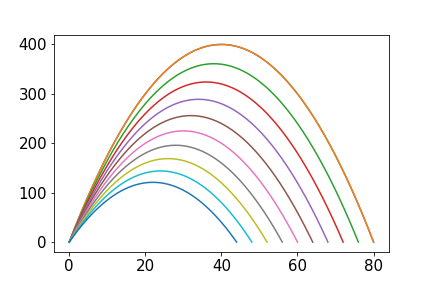

In [62]:
from scipy.integrate import solve_ivp

%matplotlib notebook

def upward_cannon(t, y): 
    return [y[1], -0.5]

def hit_ground(t, y):
    return y[0]
hit_ground.terminal = True
hit_ground.direction = -1

def apex(t,y): 
    return y[1]

def tir( v_ini=20):
    tt=np.arange(0,100.01,0.01)#instant où on veut la solution
    sol = solve_ivp(upward_cannon, [0, 100], [0, v_ini],t_eval=tt, events=(hit_ground,apex))
    print(sol.t_events)
    #print(sol.t)
    #print(sol.y[0])
    plt.plot(sol.t,sol.y[0])
    
tir(v_ini=20)


In [63]:
from ipywidgets import interact
interact(tir,  v_ini=(10, 20, 1));

interactive(children=(IntSlider(value=20, description='v_ini', max=20, min=10), Output()), _dom_classes=('widg…

Paraboles pour chute des corps voir cookbook de C Rossant
probleme de l'allumage de l'allumette traduire de matlab probleme raide
mission apollo traduire de matlab? 
orbitode.m 
L. F. Shampine and M. K. Gordon, Computer Solution of Ordinary
Differential Equations, W.H. Freeman & Co., 1975.
visualisation de champs de vecteurs en python? avec wolframalpha?
Lotka Volterra
schéma symplectique pour conserver l'énergie:
exemple de l'oscillateur harmonique numérique.


## La marchande d'allumettes
$$y'= y^2- y^3$$
$$y(0)=\epsilon \ll 1$$
 $$0\leq t \leq \frac{2}{\epsilon}$$


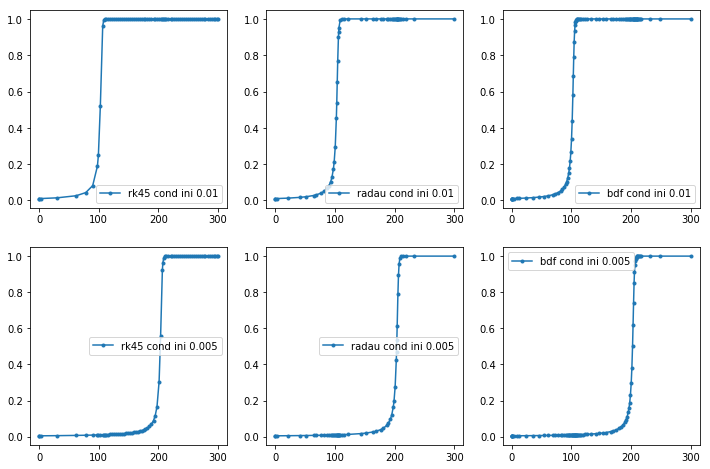

In [64]:
def allum(t, y): 
    return y**2 - y**3

sol = solve_ivp(allum, [0, 300], [0.01,0.005])
solradau = solve_ivp(allum, [0, 300], [0.01,0.005],method='Radau')
solbdf = solve_ivp(allum, [0, 300], [0.01,0.005],method='BDF')
# intervalle de temps =[0,300]
# condition initiales= 0.01, 0.005
#print(sol.t)
#print(sol.y)
%matplotlib inline
fig2 = plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.plot(sol.t,sol.y[0],'.-',label='rk45 cond ini 0.01')
plt.legend(loc='best')
plt.subplot(234)
plt.plot(sol.t,sol.y[1],'.-', label='rk45 cond ini 0.005')
plt.legend(loc='best')
plt.subplot(232)
plt.plot(solradau.t,solradau.y[0],'.-', label='radau cond ini 0.01')
plt.legend(loc='best')
plt.subplot(235)
plt.plot(solradau.t,solradau.y[1],'.-', label='radau cond ini 0.005')
plt.legend(loc='best')
plt.subplot(233)
plt.plot(solbdf.t,solbdf.y[0],'.-', label='bdf cond ini 0.01')
plt.legend(loc='best')
plt.subplot(236)
plt.plot(solbdf.t,solbdf.y[1],'.-', label='bdf cond ini 0.005')
plt.legend(loc='best')

fig2.savefig("allumette.pdf", format='pdf')

## le huit du satellite. traduire orbitode de matlab

In [38]:
url="https://hackernoon.com/you-can-get-the-source-code-for-apollo-11-and-take-a-course-on-it-0y99382u"
IFrame(url,width=800, height=600)

## orbital integration
mentionne le schéma de Nyström, une variante de Runge Kutta pour les équations du second ordre
$$y'' = f(t,y,y')$$

## Une video bien meilleure que ce que j'ai pu faire
3Blue1Brown
https://youtu.be/p_di4Zn4wz4